# Machine Learning Assignment
                                                                                               Shane Healy, October 2019

In [101]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
import keras as kr
import tensorflow as tf
import sklearn.preprocessing as pre
import sklearn.decomposition as dec
import sklearn.model_selection as mod
import sklearn.metrics as met

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.6, 9)

In [102]:
# Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
dfu = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

#Sorting the dataframe by variable medv, this sorts data rows from lowest to highest median house value
#Sorting done to visualise from plots what could be most influencial factors in median house value
df = dfu.sort_values('medv')


## Boston Housing Price DataSet - Background

The Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston, USA.REFA.

The data was originally published by Harrison, D. and Rubinfeld, D.L. "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978.

The dataset has been used to benchmark algorithms and as a demonstration of machine learning process. The dataset contains a total of 506 cases.


There are 14 attributes for each case:
* CRIM - per capita crime rate by town 
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways 
* TAX - full-value property-tax rate per 10,000 dolla bills
* PTRATIO - pupil-teacher ratio by town 
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population 
* MEDV - Median value of owner-occupied homes in $1000's <b><i>RESULT</i></br>


### Factors Influencing House Price

From initial review, based on personal perception of what factors could significantly influence median value of owner occupied houses, the factors were seperated into high and low impact factors as shown below: 


 Attribute | Why Flagged as High Impact Factor     
:------|:------
   CRIM  | People dont like crime, impacts on safety
   RM  | Implies larger properties, more invested wealth
   DIS  | Easy commuting / commerce, buses etc. 
   TAX  | What GOV estimates for value for property
   CHAS  | Distinct in data set
   Bk  | American is divided, race factors in US wealth and social structure 
   LSTAT | lower status: less £   


 Attribute | Why Flagged as Low Impact Factor     
:------|:------ 
   ZN  | Unknown
   INDUS  | Unknown
   PTRATIO  | Important but possibly lower budgeted people residing: unknown
   NOX  | Important but possibly accepted for city living
   AGE  | Unknown 
   RAD  | Commuting factors


## Describe Statistics of Data Set

In [103]:
# Check all fields have values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### Observations from Statistics
* Different scales for all factors, some in hundreds, some in decimal
* Large variation in standard deviation, TAX has the highest while NOX has the lowest
* CHAS is either a true or false

## Visualise the median house price

In [105]:
houseprice = df['medv']

In [106]:
houseprice.mean(), houseprice.min(), houseprice.max(), houseprice.std()

(22.532806324110673, 5.0, 50.0, 9.197104087379817)

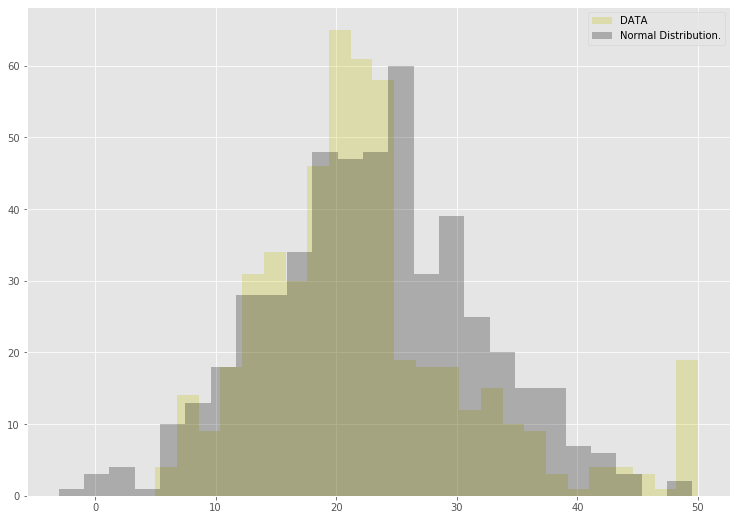

In [107]:
# Create histograms to visualise the distribution of house prices
plt.hist(houseprice, bins=25, color='y', alpha=0.25, label="DATA")
plt.hist(np.random.normal(22.53, 9.2, 506), color='k', alpha=0.25, bins = 25, label = "Normal Distribution.")
plt.legend()
plt.show()

On plotting the median house price against a random normal distribution, the dataset appears relatively normally distributed with the dataset skewed to the right. The spike at far right of about plot for data doesn't fit the normal distribution. 

In [108]:
r = houseprice.value_counts()
r, r.values

(50.0    16
 25.0     8
 23.1     7
 21.7     7
 22.0     7
         ..
 32.9     1
 25.3     1
 15.3     1
 32.2     1
 17.7     1
 Name: medv, Length: 229, dtype: int64,
 array([16,  8,  7,  7,  7,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 

There are 229 unique house price values in dataset. 
16 cases have a value of 50 ($50,000), this is out of trend in the dataset, perhaps when collecting the data an accurate figure was not collected but indicated if in range e.g. median house price greater than 50. 

## Plots to Describe the Data Set 
In this section, the 13 factors will be plotted against median house price, MEDV. 
The objective is to visualise the variation in the values of the 13 factors and to assess if there are any "obvious" trends between factors and the result of median house price. 

The boston housing price dataframe was sorted when read in, the objective was to make the relationship between factors and price more apparent. For the same reason Matplotblib.pyplot FILL plots were used in this section. These provide a good visualisation if there is a direct correlation present.

To allow visualisation of factors against MEDV, certain factors were scaled during plotting. 

In [63]:
MEDV = df['medv']

CRIM = df['crim']
RM = df['rm']
DIS = df['dis']
TAX = df['tax']
CHAS = df['chas']
BK = df['b']
LSTAT = df['lstat']
CHAS = df['chas']
ZN = df['zn']
INDUS  = df['indus']
PTRATIO  = df['ptratio']
NOX  = df['nox']
AGE  = df['age']
RAD  = df['rad']

Text(0.5, 1.0, 'Visualise Median House Price, MEDV')

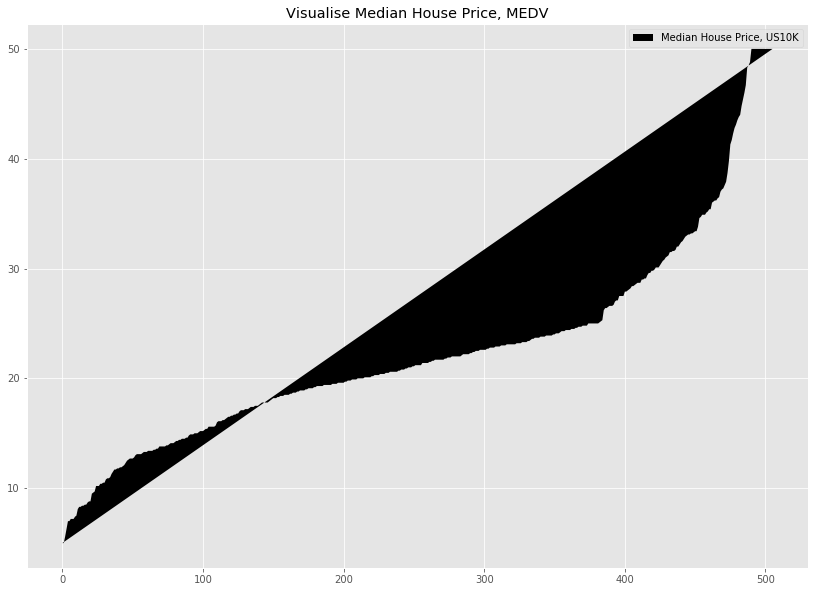

In [64]:
x = np.arange(0.0, 506, 1.0)
medv = np.sort(MEDV)
plt.fill(x, medv, 'k-', label="Median House Price, US10K")
plt.legend()
plt.title("Visualise Median House Price, MEDV")

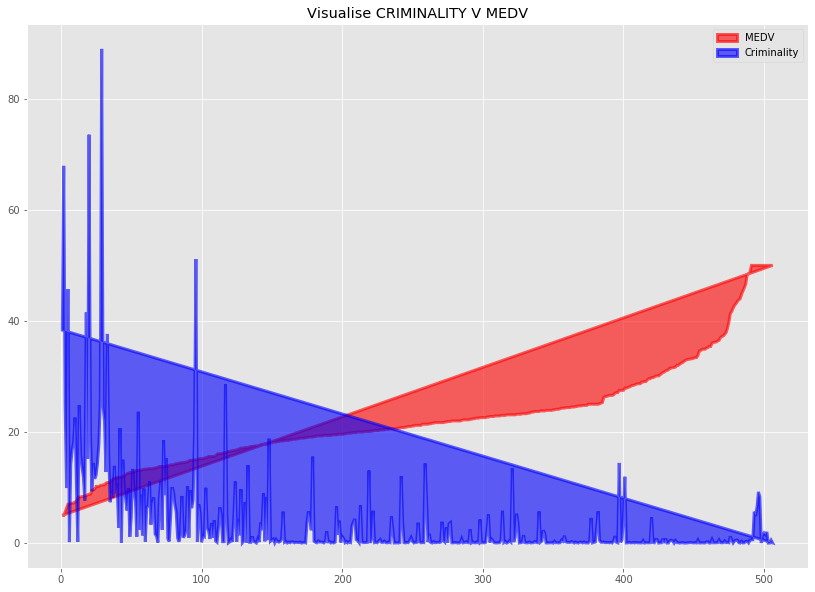

In [65]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, CRIM, c='b', alpha=0.6, lw=3.0, label="Criminality")

plt.title("Visualise CRIMINALITY V MEDV")
plt.legend();

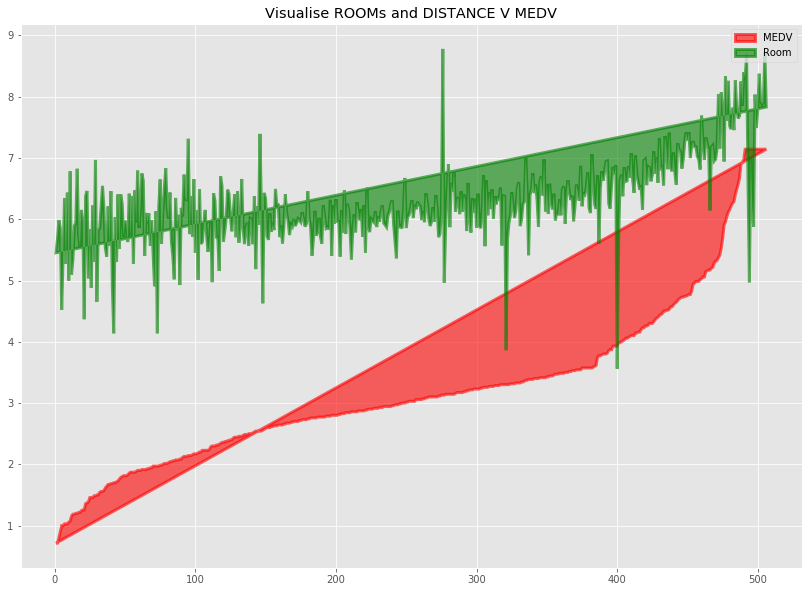

In [66]:
x = np.arange(1, 507, 1.0)

# Scaling MEDV to allow visualisation in Plot
plt.fill(x, MEDV/7, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, RM, c='g', alpha=0.6, lw=3.0, label ="Room")

plt.title("Visualise ROOMs and DISTANCE V MEDV")
plt.legend();

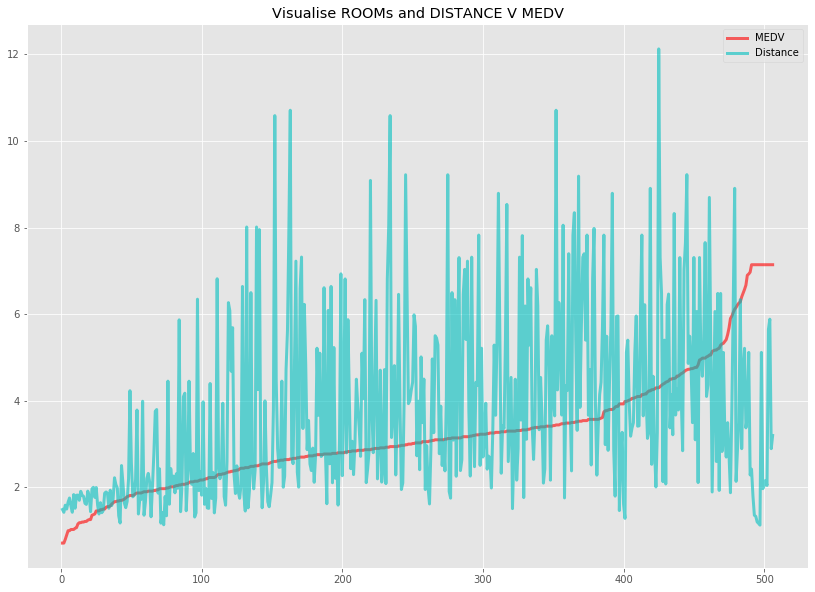

In [67]:
x = np.arange(1, 507, 1.0)

# Scaling MEDV to allow visualisation in Plot
plt.plot(x, MEDV/7, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.plot(x, DIS, c='c', alpha=0.6, lw=3.0, label ="Distance")

plt.title("Visualise ROOMs and DISTANCE V MEDV")
plt.legend();

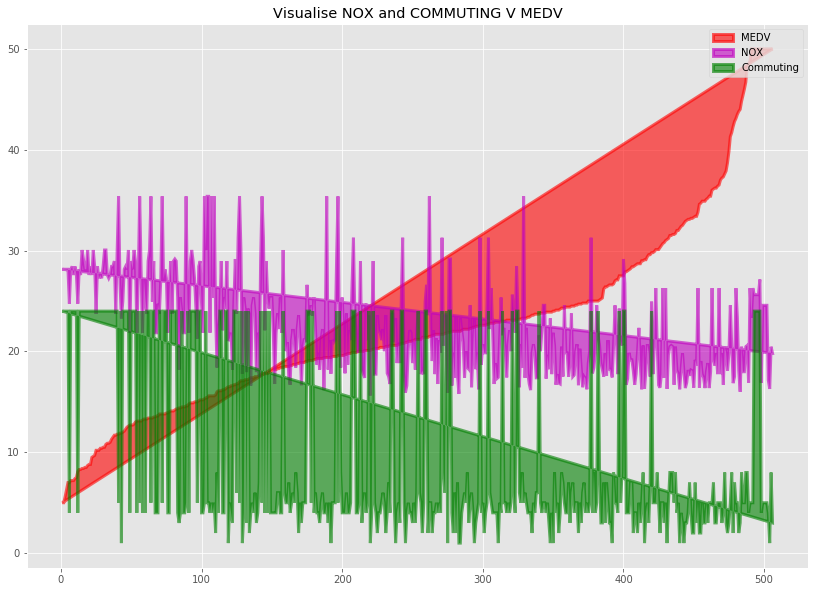

In [68]:
x = np.arange(1, 507, 1.0)



#Scaling NOX parameter to view against Median house price 
scaleNOX = NOX * (MEDV.mean()/NOX.mean())

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, scaleNOX, c='m', alpha=0.6, lw=3.0, label ="NOX")
plt.fill(x, RAD, c='g', alpha=0.6, lw=3.0, label ="Commuting")

plt.title("Visualise NOX and COMMUTING V MEDV")
plt.legend();

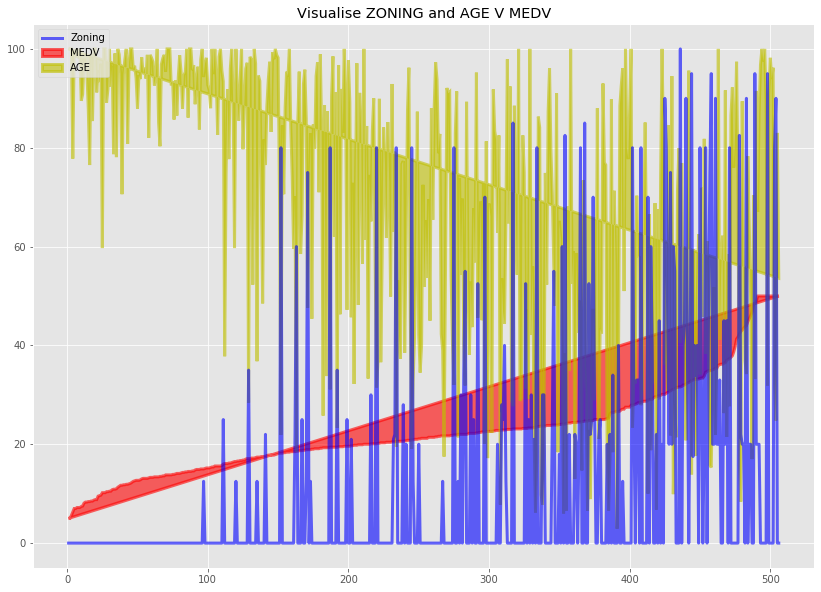

In [69]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.plot(x, ZN, c='b', alpha=0.6, lw=3.0, label ="Zoning")
plt.fill(x, AGE, c='y', alpha=0.6, lw=3.0, label ="AGE")


plt.title("Visualise ZONING and AGE V MEDV")
plt.legend();

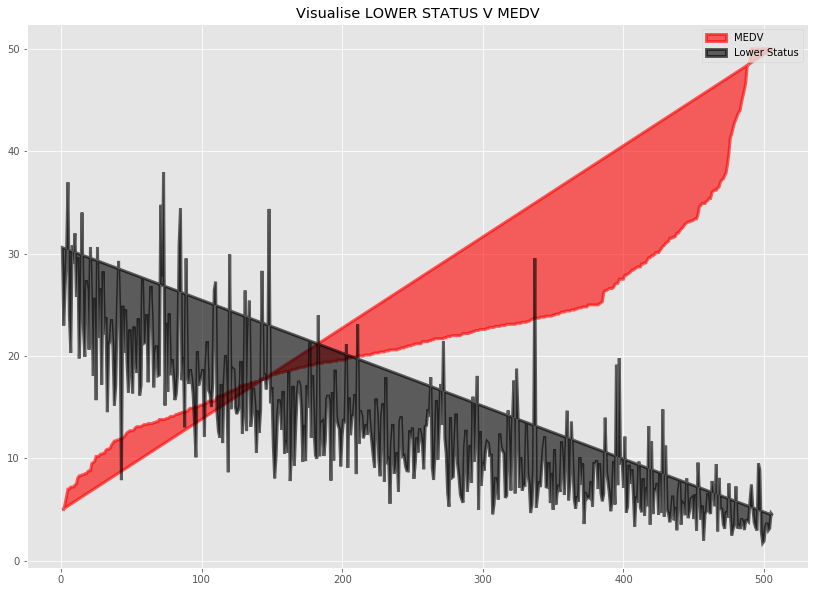

In [70]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, LSTAT, c='k', alpha=0.6, lw=3.0, label ="Lower Status")

plt.title("Visualise LOWER STATUS V MEDV")
plt.legend();

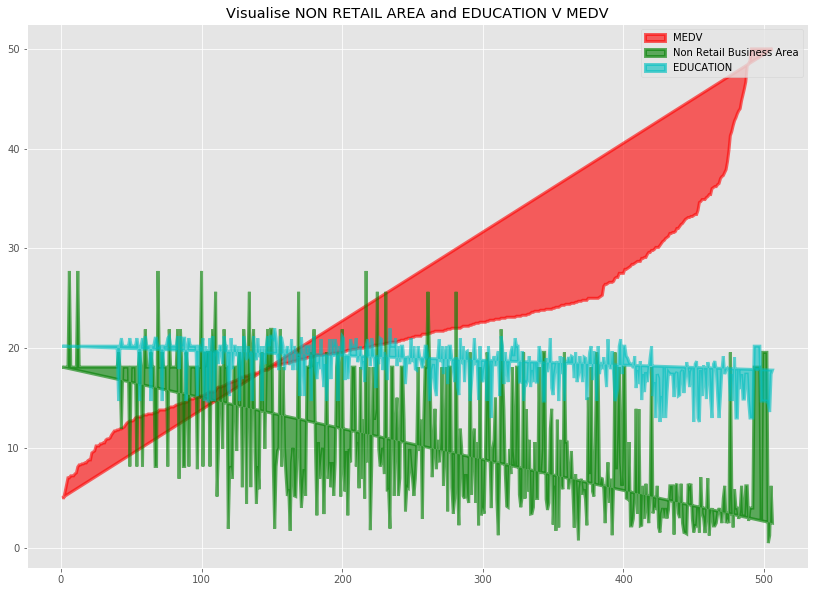

In [71]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, INDUS, c='g', alpha=0.6, lw=3.0, label ="Non Retail Business Area")
plt.fill(x, PTRATIO, c='c', alpha=0.6, lw=3.0, label ="EDUCATION")

plt.title("Visualise NON RETAIL AREA and EDUCATION V MEDV")
plt.legend();

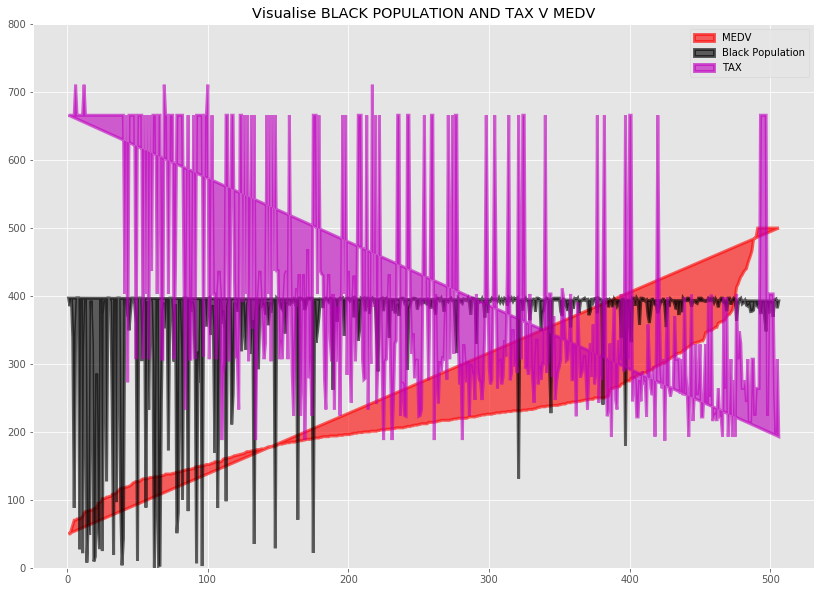

In [72]:
x = np.arange(1, 507, 1.0)

plt.fill(x, MEDV*10, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, BK, c='k', alpha=0.6, lw=3.0, label ="Black Population")
plt.fill(x, TAX, c='m', alpha=0.6, lw=3.0, label ="TAX")


x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,800))


plt.title("Visualise BLACK POPULATION AND TAX V MEDV")
plt.legend();

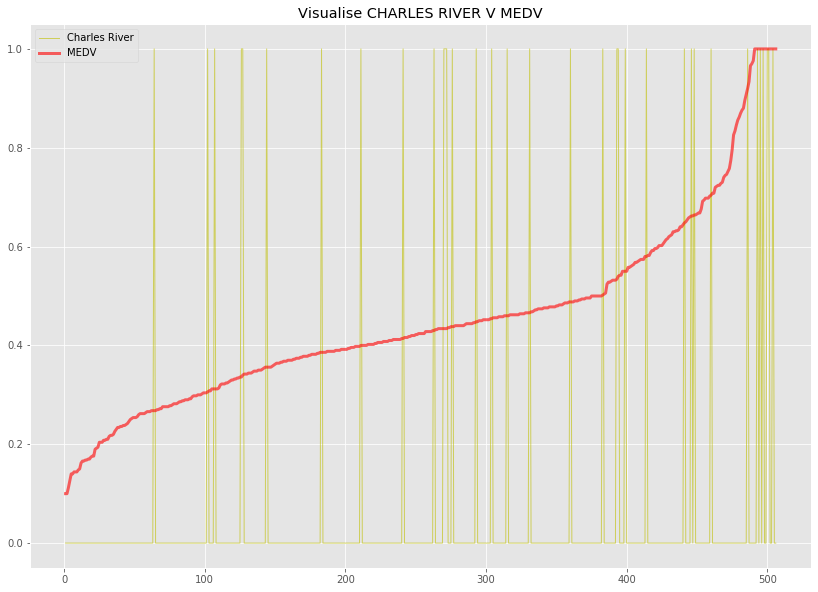

In [73]:
x = np.arange(1, 507, 1.0)

plt.plot(x, CHAS, c='y', alpha=0.6, lw=1.0, label ="Charles River")
plt.plot(x, MEDV/50, c='r', alpha=0.6, lw=3.0, label ="MEDV")

plt.title("Visualise CHARLES RIVER V MEDV")
plt.legend();

## Charles River Impact
The objective of this section is to use inferential statistics to analyse whether there is a significant difference in median house prices between houses that border the Charles river and those that do not border the Charles River.

In [74]:
# CHAS variable: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
CHAS.sum()

35

From 506 data rows, there are 35 cases where CHAS variable is true.

In [75]:
# Selecting rows where chas variable is true
dfCHAS = df.loc[df['chas'] == 1]

In [76]:
# Selecting data for median house price
a = dfCHAS['medv']

In [77]:
print("The median house price bordering Charles river is",a.median())

The median house price bordering Charles river is 23.3


In [78]:
# Selecting rows where chas variable is NOT true
dfnCHAS = df.loc[df['chas'] == 0]

In [79]:
# Selecting data for median house price
b = dfnCHAS['medv']

In [80]:
print("The median house price bordering not Charles river is",b.median())

The median house price bordering not Charles river is 20.9


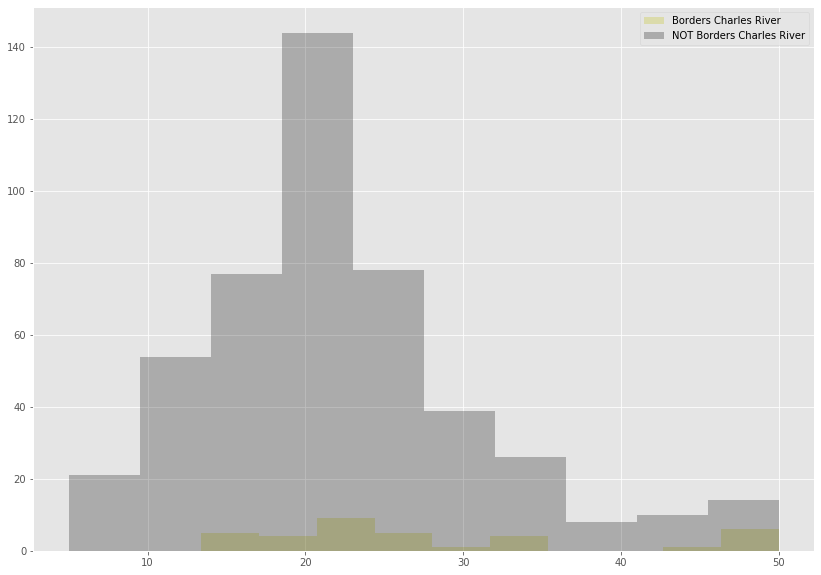

In [81]:
plt.hist(a, color='y', alpha=0.25, label="Borders Charles River")
plt.hist(b, color='k', alpha=0.25, label="NOT Borders Charles River")
plt.legend()
plt.show()

### T-TEST

The independent t-test could be used to compare the means of the two groups (independant variables) below with regard to the same dependant variable of house price:
* houses bordering the Charles river
* housees not bordering the Charles river

To check if data can be analysed with independant t-test there are six assumptions that should be checked before progressing(REF 4).
1. Dependant variable, house price, should be measured on a continuous scale. House price measured on US$ scale.
2. Independant variables should be two independant catagorical groups. Bordering Charles river : True or False.
3. Independance of observations. Assumed no relationahsip between data in each group or between groups.
4. No significant outliers. From plotting medv, no significant outliers apparent.
5. Dependant variable, house price, should be normally distributed for each group. Discussed below.
6. Requires homogeneity of variances. Discussed below.

#### Are groups for median house prices normally distributed, are T-Tests applicable
As plotted at beginning of notebook to visualise the median house price, overall the data set appears normally distributed.

In below cell a check was performed with QQ plot from statsmodels, fit against the expected diagonal pattern for normal distribution is accentuted at the upper and lower bounds but overall a reasonable fit.

A similar appearance of below graph is generated for:
* The overall set of data on median house prices
* Group bordering the Charles River
* Group not bordering Charles River

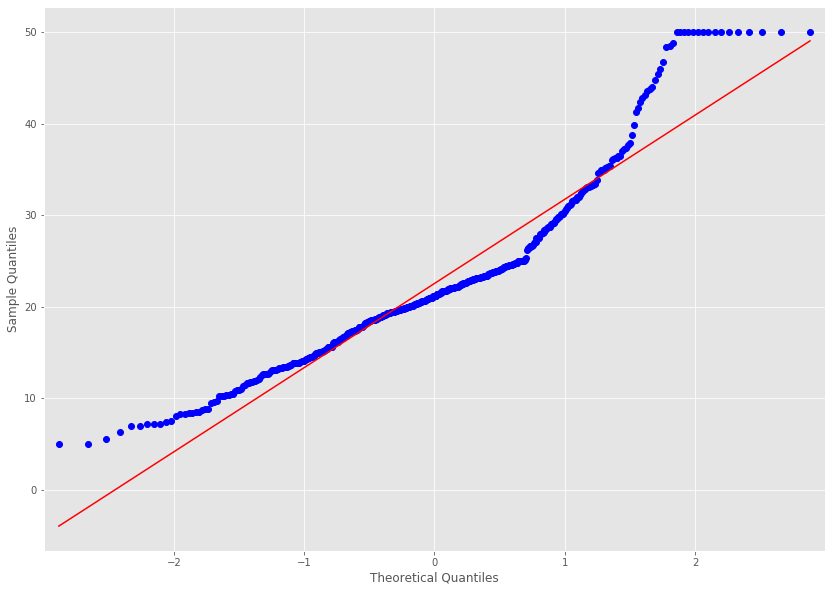

In [82]:
from statsmodels.graphics.gofplots import qqplot
qqplot(MEDV, line='s')
plt.show()

Below cell uses stats.normaltest to assess distribution of:
* medv, All median house prices  <b>Appears not normal distribution</b>
* a, Median house prices bordering Charles River <b>Appears normal distribution</b>
* b, Median house prices not bordering Charles River <b>Appears not normal distribution</b>

If p from stats.normaltest > alpha, appears normal / Gaussian.

In [83]:

alpha = 0.05

stat, p = stats.normaltest(medv)
print('MEDV, all data, Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.normaltest(a)
print('Houses bordering Charles River, Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.normaltest(b)
print('Houses not bordering Charles River, Statistics=%.3f, p=%.3f' % (stat, p))



MEDV, all data, Statistics=90.975, p=0.000
Houses bordering Charles River, Statistics=5.439, p=0.066
Houses not bordering Charles River, Statistics=81.133, p=0.000


#### Homogeneity of variances, are T-Tests applicable
The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 

If the resulting p-value of Levene's test is less than a value of 0.05, the obtained differences in sample variances are unlikely to be from a population with equal variances. Therefore the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population. REF6.

In [84]:
# center = mean: Recommended from SciPy documentation for symmetric, moderate-tailed distributions.
stats.levene(a,b,center='mean')

LeveneResult(statistic=8.751904896045993, pvalue=0.003238119367639829)

Given a close approximation to normal distribution for each group of median house prices, and from failed Levene test for homogeneity of variances will use Welch's t-test.

Welch's T-Test is a two sample test used to test the hypotheses that two populations have equal means and suited where two samples have unequal variances and/or unequal sample sizes.REF5.

In [85]:
stats.ttest_ind(df['medv'][df['chas']==1], df['medv'][df['chas']==0], equal_var=0)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

### Conclusion on Charles River Impact
As the P Value from Welsh's T-Test of 0.0036 is less than indicator of 0.05, this shows significance. 
Therefore the null hypothesis that the two population means are equal is rejected and there is a significant difference in median house prices between houses that border the Charles river and those that do not. 

This relys on an assumption of normallly distributed data.  

## Model
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System

TensorFlow 2 and Keras installed on machine.


Reviewing the plots from beginning of notebook, the following observations were made:

* Overall shape of sorted median house prices, MEDV, appears polynomial.
* Criminality, CRIM, has large variation, but as expected variation and values are lower at higher MEDV values. 
* Room has low levels of variation, relative to other factors, and appears to correlate well with MEDV.
* Distance and Zoning have large variation and no trend with MEDV is apparent.
* NOX, Commuting, Age and Non Retail Business Area, overall, seem to be inversely proportional to MEDV with large variation. 
* Lower Status, LSTAT, and Education, PTRATIO, have low levels of variation, relative to other factors, and appears to inversely correlate well with MEDV.
* TAX and Black Population have variation but appears inversely proportional to MEDV.
* CHAS as a TRUE/FALSE does not seem to correlate with MEDV.

Therefore, the following five factors seem like appropriate choices to begin modelling with:
* RM - average number of rooms per dwelling
* LSTAT - percentage lower status of the population
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* TAX - full-value property-tax rate per 10,000 dolla bills

Factors remaining:
* NOX - nitric oxides concentration (parts per 10 million)
* INDUS - proportion of non-retail business acres per town.
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways 

(14.0, 0.0)

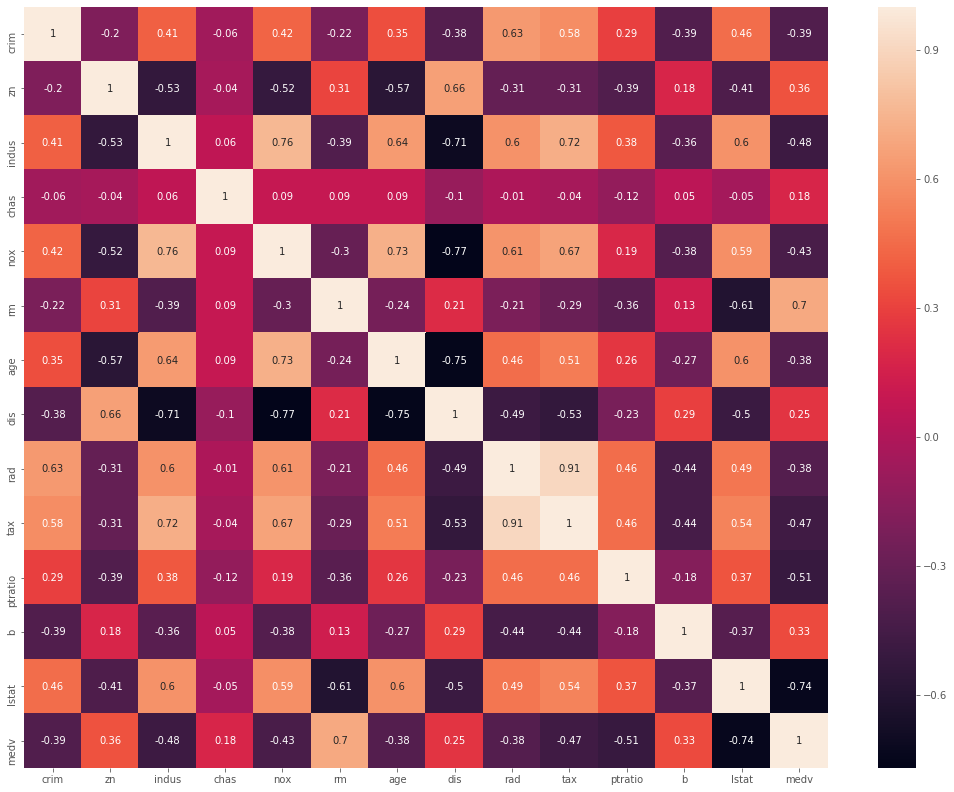

In [86]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(18,14))
ax = sns.heatmap(data=correlation_matrix, annot=True)

# Axis parameters set to display plot fully 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From correlation matrix, MEDV has highest correlation with following factors (in order of absolute correlation):
* lstat
* rm
* ptratio
* Indus
* Tax
* NOX

The remaining factors have simimlar correlation apart from chas which has the lowest.
This is similar to information from visualising plots of factors, indus was not identified and bk was identified.


The highest correlation between factors excluding MEDV are:
* lstat and rm --> Given these factors have highest correlation with MEDV, their own correlation will need consideration
* tax with rad
* tax with indus
* nox with (indus,age)
* dis with (indus, nox, age) 


#### DEFINE INPUTs and OUTPUT

In [182]:
inputs = df[['rm','lstat','ptratio','indus','tax','nox']]
#inputs = df[['rm','lstat','ptratio']]

In [183]:
output = df[['medv']]

#### Standard Scaler

In [184]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
scaler.mean_, scaler.scale_

(array([  6.28463439,  12.65306324,  18.4555336 ,  11.13677866,
        408.23715415,   0.55469506]),
 array([7.01922514e-01, 7.13400164e+00, 2.16280519e+00, 6.85357058e+00,
        1.68370495e+02, 1.15763115e-01]))

In [185]:
m = kr.models.Sequential()

In [187]:
m.add(kr.layers.Dense(10,input_dim=6,activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(200, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(inputs,output,epochs=25,batch_size=50)

Epoch 1/25
506/506 [==============================] - 23s 45ms/step - loss: 283.3925
Epoch 2/25
506/506 [==============================] - 0s 648us/step - loss: 201.0763
Epoch 3/25
506/506 [==============================] - 0s 707us/step - loss: 153.5193
Epoch 4/25
506/506 [==============================] - 0s 771us/step - loss: 114.0060
Epoch 5/25
506/506 [==============================] - 0s 912us/step - loss: 80.3993
Epoch 6/25
506/506 [==============================] - 0s 840us/step - loss: 86.9540
Epoch 7/25
506/506 [==============================] - 0s 820us/step - loss: 56.2146
Epoch 8/25
506/506 [==============================] - 0s 830us/step - loss: 56.9756
Epoch 9/25
506/506 [==============================] - 0s 973us/step - loss: 49.8432
Epoch 10/25
506/506 [==============================] - ETA: 0s - loss: 48.89 - 0s 917us/step - loss: 46.8851
Epoch 11/25
506/506 [==============================] - 1s 1ms/step - loss: 46.0574: 0s - l
Epoch 12/25
506/506 [===================

In [188]:
# Run each value through the neural network.
p = m.predict(inputs)

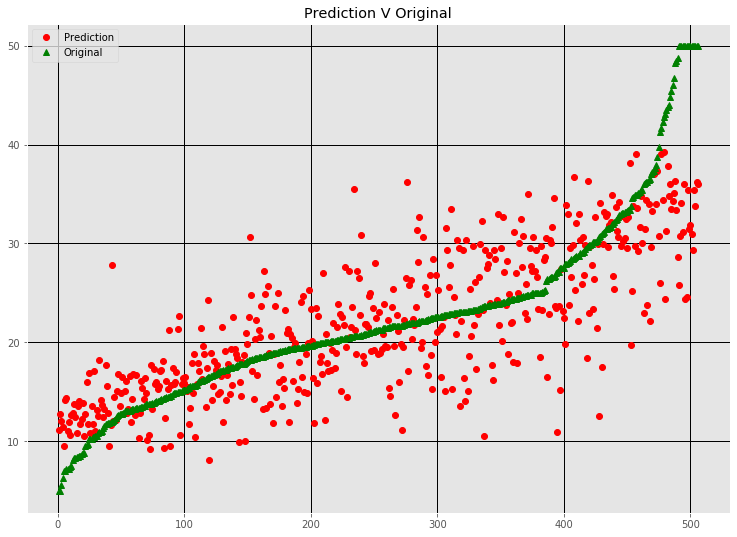

In [189]:
# Plot the values

x = np.arange(1, 507, 1.0)


plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, MEDV, 'g^', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original")
plt.legend()

* CRIM - per capita crime rate by town 
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways 
* TAX - full-value property-tax rate per 10,000 dolla bills
* PTRATIO - pupil-teacher ratio by town 
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population


In [298]:
inputs = df[['rm','lstat','ptratio','indus','tax','nox','rad','zn','age','dis','crim','chas','b']]
#inputs = df[['rm','lstat','ptratio','indus','tax','nox']]

In [299]:
output = df[['medv']]

#### Decomposition

In [300]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputs)
xwhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)


In [301]:
m = kr.models.Sequential()

In [302]:
m.add(kr.layers.Dense(10,input_dim=13,activation="linear"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(50, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adamax")
m.fit(xwhite,output,epochs=100,batch_size=25)

Epoch 1/100
506/506 [==============================] - 29s 58ms/step - loss: 473.9503
Epoch 2/100
506/506 [==============================] - 1s 1ms/step - loss: 143.9146
Epoch 3/100
506/506 [==============================] - 1s 1ms/step - loss: 71.9308: 0s - los
Epoch 4/100
506/506 [==============================] - 1s 2ms/step - loss: 46.4195: 0s - l - ETA: 0s - los
Epoch 5/100
506/506 [==============================] - 1s 2ms/step - loss: 35.6201
Epoch 6/100
506/506 [==============================] - 1s 2ms/step - loss: 29.1028
Epoch 7/100
506/506 [==============================] - 1s 2ms/step - loss: 24.9027
Epoch 8/100
506/506 [==============================] - 1s 2ms/step - loss: 21.7299: 0s - loss:
Epoch 9/100
506/506 [==============================] - 1s 2ms/step - loss: 19.9090
Epoch 10/100
506/506 [==============================] - 1s 2ms/step - loss: 18.1501: 0s -
Epoch 11/100
506/506 [==============================] - 1s 2ms/step - loss: 16.5817
Epoch 12/100
506/506 [=======

506/506 [==============================] - 1s 2ms/step - loss: 2.4846
Epoch 95/100
506/506 [==============================] - 1s 2ms/step - loss: 2.2518A: 0s - loss: 2.2
Epoch 96/100
506/506 [==============================] - 1s 3ms/step - loss: 2.2495A: 0s - loss: 2.2
Epoch 97/100
506/506 [==============================] - 1s 2ms/step - loss: 2.4468
Epoch 98/100
506/506 [==============================] - 1s 2ms/step - loss: 2.3712
Epoch 99/100
506/506 [==============================] - 1s 2ms/step - loss: 2.3190
Epoch 100/100
506/506 [==============================] - 1s 2ms/step - loss: 2.2399A: 0s - lo


In [303]:
# Run each x value through the neural network.
p = m.predict(xwhite)

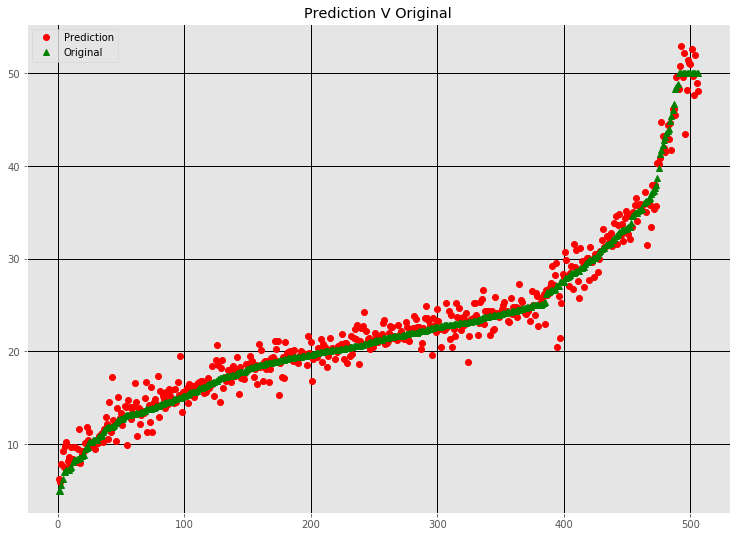

In [304]:
# Plot the values
x = np.arange(1, 507, 1.0)
plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, MEDV, 'g^', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original")
plt.legend()

## References

1. Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv 
A. The Boston Housing Dataset, https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
2. Keras, https://keras.io/#getting-started-30-seconds-to-keras
3. Data Set CSO, https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
4. Laerd Statistics, https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
5. Welch's t-test, https://en.wikipedia.org/wiki/Welch%27s_t-test
6. Levene's Test, https://en.wikipedia.org/wiki/Levene%27s_test

## Assignment:
https://github.com/ianmcloughlin/project-2019-machstat/raw/master/project.pdf

### Appendix


TODO
insert links to PNG from github address after commited

#### First Neural Network
Factors chosen shown below, no pre-processing.
![Keras](https://github.com/ianmcloughlin/images/raw/master/keras.png)

#### Second Neural Network
All factors chosen as inputs, pre-processing with PCA.
![Keras](https://github.com/ianmcloughlin/images/raw/master/keras.png)

#### Third Neural Network
All factors chosen as inputs, more layers added, pre-processing with PCA.
![Keras](https://github.com/ianmcloughlin/images/raw/master/keras.png)